In [1]:
import pandas as pd
import joblib
games = pd.read_csv('vgchartz-22_12_2016.csv')
games.head(6)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [3]:
len(games.index)

16719

In [4]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      games.isnull().sum()/len(games))

 
Count total NaN at each column in a DataFrame : 

 Name               0.000120
Platform           0.000000
Year_of_Release    0.016089
Genre              0.000120
Publisher          0.003230
NA_Sales           0.000000
EU_Sales           0.000000
JP_Sales           0.000000
Other_Sales        0.000000
Global_Sales       0.000000
Critic_Score       0.513308
Critic_Count       0.513308
User_Score         0.546025
User_Count         0.546025
Developer          0.396136
Rating             0.404869
dtype: float64


In [5]:
games.nunique()

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            582
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            95
User_Count           888
Developer           1696
Rating                 8
dtype: int64

In [6]:
g=games[["Platform","Genre","Publisher","Critic_Score","Rating","Global_Sales","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
g

,Platform,Genre,Publisher,Critic_Score,Rating,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,Sports,Nintendo,76.0,E,82.53,41.36,28.96,3.77,8.45
1,NES,Platform,Nintendo,NaN,NaN,40.24,29.08,3.58,6.81,0.77
2,Wii,Racing,Nintendo,82.0,E,35.52,15.68,12.76,3.79,3.29
3,Wii,Sports,Nintendo,80.0,E,32.77,15.61,10.93,3.28,2.95
4,GB,Role-Playing,Nintendo,NaN,NaN,31.37,11.27,8.89,10.22,1.00
...,...,...,...,...,...,...,...,...,...,...
16714,PS3,Action,Tecmo Koei,NaN,NaN,0.01,0.00,0.00,0.01,0.00
16715,X360,Sports,Codemasters,NaN,NaN,0.01,0.00,0.01,0.00,0.00
16716,PSV,Adventure,Idea Factory,NaN,NaN,0.01,0.00,0.00,0.01,0.00
16717,GBA,Platform,Wanadoo,NaN,NaN,0.01,0.01,0.00,0.00,0.00


In [7]:
print(games.groupby(["Platform"]).mean()["Global_Sales"])

Platform
2600    0.729925
3DO     0.033333
3DS     0.498250
DC      0.307115
DS      0.375046
GB      2.606633
GBA     0.387470
GC      0.358561
GEN     1.061379
GG      0.040000
N64     0.686144
NES     2.561939
NG      0.120000
PC      0.267248
PCFX    0.030000
PS      0.610426
PS2     0.581046
PS3     0.705808
PS4     0.799567
PSP     0.243424
PSV     0.125278
SAT     0.194162
SCD     0.311667
SNES    0.837029
TG16    0.080000
WS      0.236667
Wii     0.687977
WiiU    0.558912
X360    0.769913
XB      0.313422
XOne    0.645506
Name: Global_Sales, dtype: float64


In [8]:
print(games.groupby(["Rating"]).mean()["Global_Sales"])

Rating
AO      1.950000
E       0.610599
E10+    0.461838
EC      0.222500
K-A     1.443333
M       0.942956
RP      0.026667
T       0.504694
Name: Global_Sales, dtype: float64


In [9]:
games.isnull().sum()/len(games)

Name               0.000120
Platform           0.000000
Year_of_Release    0.016089
Genre              0.000120
Publisher          0.003230
NA_Sales           0.000000
EU_Sales           0.000000
JP_Sales           0.000000
Other_Sales        0.000000
Global_Sales       0.000000
Critic_Score       0.513308
Critic_Count       0.513308
User_Score         0.546025
User_Count         0.546025
Developer          0.396136
Rating             0.404869
dtype: float64

In [10]:
g.isnull().sum()/len(games)

Platform        0.000000
Genre           0.000120
Publisher       0.003230
Critic_Score    0.513308
Rating          0.404869
Global_Sales    0.000000
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
dtype: float64

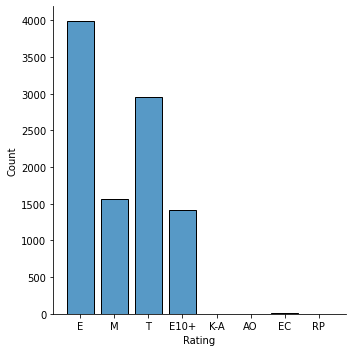

In [11]:
import seaborn as sns
sns.displot(g, x="Rating", shrink=.8)


<AxesSubplot:xlabel='Global_Sales'>

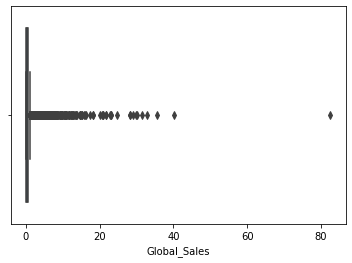

In [12]:
sns.boxplot(x=games["Global_Sales"])

<AxesSubplot:xlabel='NA_Sales'>

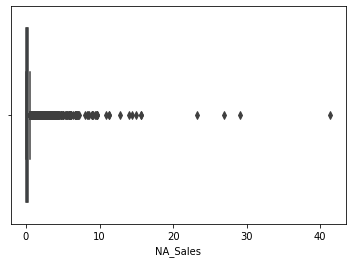

In [13]:
import seaborn as sns
sns.boxplot(x=games["NA_Sales"])

<AxesSubplot:xlabel='Critic_Score'>

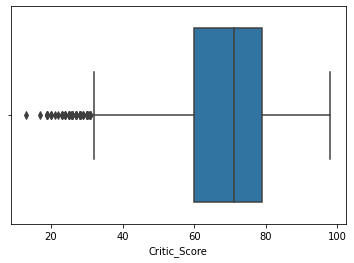

In [14]:
sns.boxplot(x=games["Critic_Score"])

In [15]:
g.corr()

,Critic_Score,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Critic_Score,1.000000,0.245471,0.240755,0.220752,0.152593,0.198554
Global_Sales,0.245471,1.000000,0.941010,0.901239,0.612300,0.749242
NA_Sales,0.240755,0.941010,1.000000,0.765336,0.449598,0.638654
EU_Sales,0.220752,0.901239,0.765336,1.000000,0.435068,0.722796
JP_Sales,0.152593,0.612300,0.449598,0.435068,1.000000,0.291096
Other_Sales,0.198554,0.749242,0.638654,0.722796,0.291096,1.000000


In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [17]:
g["Rating"].fillna("RP", inplace = True)
g.head(10)

/tmp/ipykernel_37244/3003428008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g["Rating"].fillna("RP", inplace = True)


,Platform,Genre,Publisher,Critic_Score,Rating,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,Sports,Nintendo,76.0,E,82.53,41.36,28.96,3.77,8.45
1,NES,Platform,Nintendo,NaN,RP,40.24,29.08,3.58,6.81,0.77
2,Wii,Racing,Nintendo,82.0,E,35.52,15.68,12.76,3.79,3.29
3,Wii,Sports,Nintendo,80.0,E,32.77,15.61,10.93,3.28,2.95
4,GB,Role-Playing,Nintendo,NaN,RP,31.37,11.27,8.89,10.22,1.00
5,GB,Puzzle,Nintendo,NaN,RP,30.26,23.20,2.26,4.22,0.58
6,DS,Platform,Nintendo,89.0,E,29.80,11.28,9.14,6.50,2.88
7,Wii,Misc,Nintendo,58.0,E,28.92,13.96,9.18,2.93,2.84
8,Wii,Platform,Nintendo,87.0,E,28.32,14.44,6.94,4.70,2.24
9,NES,Shooter,Nintendo,NaN,RP,28.31,26.93,0.63,0.28,0.47


In [18]:
#g["Critic_Score"].fillna(games["Critic_Score"].median(), inplace = True)


In [19]:
g.head()

,Platform,Genre,Publisher,Critic_Score,Rating,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,Sports,Nintendo,76.0,E,82.53,41.36,28.96,3.77,8.45
1,NES,Platform,Nintendo,NaN,RP,40.24,29.08,3.58,6.81,0.77
2,Wii,Racing,Nintendo,82.0,E,35.52,15.68,12.76,3.79,3.29
3,Wii,Sports,Nintendo,80.0,E,32.77,15.61,10.93,3.28,2.95
4,GB,Role-Playing,Nintendo,NaN,RP,31.37,11.27,8.89,10.22,1.00


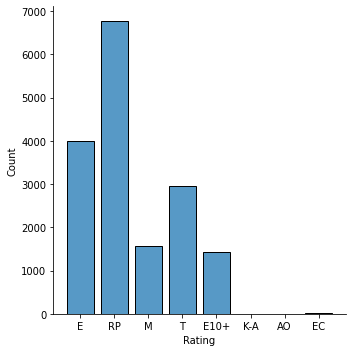

In [20]:
sns.displot(g, x="Rating", shrink=.8)


In [21]:
g=g.dropna()

In [22]:
g

,Platform,Genre,Publisher,Critic_Score,Rating,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,Sports,Nintendo,76.0,E,82.53,41.36,28.96,3.77,8.45
2,Wii,Racing,Nintendo,82.0,E,35.52,15.68,12.76,3.79,3.29
3,Wii,Sports,Nintendo,80.0,E,32.77,15.61,10.93,3.28,2.95
6,DS,Platform,Nintendo,89.0,E,29.80,11.28,9.14,6.50,2.88
7,Wii,Misc,Nintendo,58.0,E,28.92,13.96,9.18,2.93,2.84
...,...,...,...,...,...,...,...,...,...,...
16700,PC,Shooter,Destineer,61.0,T,0.01,0.01,0.00,0.00,0.00
16701,GC,Puzzle,Ubisoft,53.0,E,0.01,0.01,0.00,0.00,0.00
16702,DS,Puzzle,Majesco Entertainment,48.0,E,0.01,0.01,0.00,0.00,0.00
16706,PC,Strategy,Unknown,60.0,E10+,0.01,0.00,0.01,0.00,0.00


In [23]:
g.isnull().sum()/len(games)

Platform        0.0
Genre           0.0
Publisher       0.0
Critic_Score    0.0
Rating          0.0
Global_Sales    0.0
NA_Sales        0.0
EU_Sales        0.0
JP_Sales        0.0
Other_Sales     0.0
dtype: float64

In [24]:
#l=g.groupby(["tolist().sort()"]).count()["Global_Sales"]
#k=l.tolist().sort()

In [25]:
l=g["Publisher"]
ls=g["Publisher"].nunique()
l.count()
ls

304

In [26]:
print(l.tolist())

['Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Microsoft Game Studios', 'Nintendo', 'Take-Two Interactive', 'Take-Two Interactive', 'Nintendo', 'Take-Two Interactive', 'Take-Two Interactive', 'Nintendo', 'Sony Computer Entertainment', 'Activision', 'Activision', 'Activision', 'Activision', 'Activision', 'Activision', 'Take-Two Interactive', 'Nintendo', 'Nintendo', 'Activision', 'Take-Two Interactive', 'Nintendo', 'Microsoft Game Studios', 'Sony Computer Entertainment', 'Nintendo', 'Take-Two Interactive', 'Sony Computer Entertainment', 'Nintendo', 'Sony Computer Entertainment', 'Activision', 'Take-Two Interactive', 'Activision', 'Ubisoft', 'Nintendo', 'Microsoft Game Studios', 'Sony Computer Entertainment', 'Microsoft Game Studios', 'Sony Computer Entertainment', 'Ubisoft', 'Activision', 'Activision', 'Nintendo', 'Nintendo', 'Bethesda Softworks', 'Electronic Arts', 'Microsoft Game Studios', 'Nintendo', 'Nintendo', 'Electronic Arts', 'So

In [27]:
from collections import defaultdict

def leaders(xs, top=20):
    counts = defaultdict(int)
    for x in xs:
        counts[x] += 1
    return sorted(counts.items(), reverse=True, key=lambda tup: tup[1])[:top]

In [28]:
leaders(l,30)

[('Electronic Arts', 1029),
 ('Activision', 569),
 ('Ubisoft', 558),
 ('THQ', 405),
 ('Sony Computer Entertainment', 349),
 ('Konami Digital Entertainment', 328),
 ('Sega', 319),
 ('Nintendo', 310),
 ('Take-Two Interactive', 294),
 ('Namco Bandai Games', 279),
 ('Capcom', 215),
 ('Atari', 214),
 ('Warner Bros. Interactive Entertainment', 153),
 ('Microsoft Game Studios', 147),
 ('Tecmo Koei', 145),
 ('Midway Games', 144),
 ('Eidos Interactive', 139),
 ('Square Enix', 138),
 ('Vivendi Games', 137),
 ('Codemasters', 121),
 ('Disney Interactive Studios', 103),
 ('505 Games', 95),
 ('Unknown', 91),
 ('Acclaim Entertainment', 86),
 ('Deep Silver', 84),
 ('LucasArts', 74),
 ('Rising Star Games', 63),
 ('Nippon Ichi Software', 61),
 ('Bethesda Softworks', 52),
 ('D3Publisher', 47)]

In [29]:
print(games.groupby(["Publisher"]).mean()["Global_Sales"])

Publisher
10TACLE Studios                 0.036667
1C Company                      0.033333
20th Century Fox Video Games    0.388000
2D Boy                          0.040000
3DO                             0.281111
                                  ...   
id Software                     0.030000
imageepoch Inc.                 0.020000
inXile Entertainment            0.100000
mixi, Inc                       0.870000
responDESIGN                    0.065000
Name: Global_Sales, Length: 582, dtype: float64


In [30]:
x=g[["Platform","Genre","Publisher","Critic_Score","Rating"]]

In [31]:
y=g["Global_Sales"]

In [32]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
onenc=["Platform","Genre","Rating"]
enc = OneHotEncoder(handle_unknown='ignore')
for i in onenc:
    one_hot = pd.get_dummies(x[i])
    x = x.drop(i,axis = 1)
    x = x.join(one_hot)

In [33]:
x

,Publisher,Critic_Score,3DS,DC,DS,GBA,GC,PC,PS,PS2,...,Simulation,Sports,Strategy,AO,E,E10+,K-A,M,RP,T
0,Nintendo,76.0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,Nintendo,82.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Nintendo,80.0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,Nintendo,89.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,Nintendo,58.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Destineer,61.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16701,Ubisoft,53.0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16702,Majesco Entertainment,48.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16706,Unknown,60.0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [34]:
x.columns

Index(['Publisher', 'Critic_Score', '3DS', 'DC', 'DS', 'GBA', 'GC', 'PC', 'PS',
       'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XB', 'XOne',
       'Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy',
       'AO', 'E', 'E10+', 'K-A', 'M', 'RP', 'T'],
      dtype='object')

In [35]:
x=x.drop("Publisher",axis=1)
#x=x.drop("Critic_Score",axis=1)

x

,Critic_Score,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,...,Simulation,Sports,Strategy,AO,E,E10+,K-A,M,RP,T
0,76.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,82.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,80.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,89.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,58.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,61.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16701,53.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16702,48.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16706,60.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#max_depth=2
regr = RandomForestRegressor(random_state=0)
regr.fit(x_train, y_train)
 

RandomForestRegressor(random_state=0)

In [38]:
predictions=regr.predict(x_test)

In [39]:
critic_score, platform, genre, rating = 70,[],[],[]
for i in range(17):
    platform.append(0)

for i in range(12):
    genre.append(0)

for i in range(7):
    rating.append(0)

platform[7] = 1
genre[3] = 1
rating[2] = 1

example = [[critic_score] + platform + genre + rating ]
yyyy = regr.predict(example)

/home/salim/VG-Sales/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [40]:
yyyy

array([1.00871])

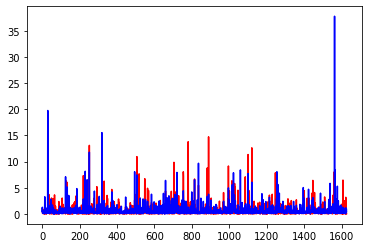

In [41]:
from numpy import *
import math
import matplotlib.pyplot as plt
t=range(len(y_test))
plt.plot(t,y_test, 'r') # plotting t, a separately 
plt.plot(t,predictions, 'b') # plotting t, b separately 

In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE for random forest: %f" % (rmse))

RMSE for random forest: 1.533848


In [43]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
#data_dmatrix = xgb.DMatrix(data=X,label=y)
"""xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)"""
xg_reg = xgb.XGBRegressor()
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_test)



/home/salim/VG-Sales/env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/salim/VG-Sales/env/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [44]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE xgboost %f" % (rmse))


RMSE xgboost 1.520158


In [45]:
filename = 'total_model.h5'
xg_reg.save_model('total_model.json')

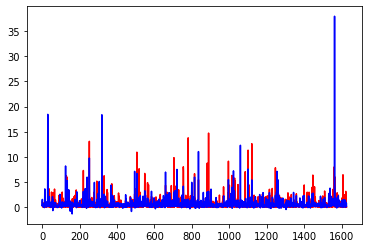

In [46]:
plt.plot(t,y_test, 'r') # plotting t, a separately 
plt.plot(t,preds, 'b') # plotting t, b separately 

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
#max_depth=2
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)


DecisionTreeRegressor(random_state=0)

In [48]:
predictions2=regressor.predict(x_test)

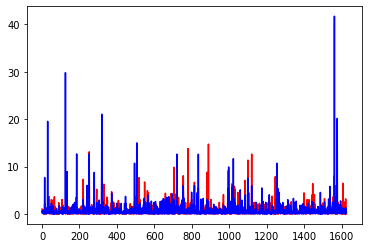

In [49]:
plt.plot(t,y_test, 'r') # plotting t, a separately 
plt.plot(t,predictions2, 'b') # plotting t, b separately 

In [50]:
rmse = np.sqrt(mean_squared_error(y_test, predictions2))
print("RMSE: %f" % (rmse))

RMSE: 1.940587


**the random forest is the best model here**

## model for europe sales

In [51]:
y=g['EU_Sales']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
#max_depth=2
regr_EU = RandomForestRegressor(random_state=0)
regr_EU.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [52]:
predictions=regr_EU.predict(x_test)

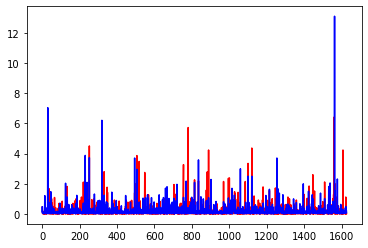

In [53]:
t=range(len(y_test))
plt.plot(t,y_test, 'r') # plotting t, a separately 
plt.plot(t,predictions, 'b') # plotting t, b separately 

In [54]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE for random forest: %f" % (rmse))

RMSE for random forest: 0.588116


In [55]:
filename = 'app/models/europe_model.h5'
joblib.dump(regr_EU, filename)

['app/models/europe_model.h5']

##model for north america

In [56]:
y=g['NA_Sales']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
#max_depth=2
regr_NA = RandomForestRegressor(random_state=0)
regr_NA.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [57]:
filename = 'app/models/NA_model.h5'
joblib.dump(regr_NA, filename)

['app/models/NA_model.h5']

In [58]:
predictions=regr_NA.predict(x_test)

In [59]:
critic_score, platform, genre, rating = 70,[],[],[]
for i in range(17):
    platform.append(0)

for i in range(12):
    genre.append(0)

for i in range(7):
    rating.append(0)

platform[7] = 1
genre[3] = 1
rating[2] = 1

example = [[critic_score] + platform + genre + rating ]
yyyy = regr.predict(example)

/home/salim/VG-Sales/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [60]:
yyyy

array([1.00871])

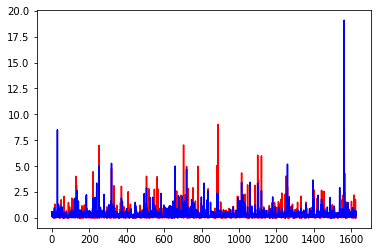

In [61]:
t=range(len(y_test))
plt.plot(t,y_test, 'r') # plotting t, a separately 
plt.plot(t,predictions, 'b') # plotting t, b separately 

In [62]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE for random forest: %f" % (rmse))

RMSE for random forest: 0.755837


##model for Japan

In [63]:
y=g['JP_Sales']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
#max_depth=2
regr_JP = RandomForestRegressor(random_state=0)
regr_JP.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [64]:
predictions=regr_JP.predict(x_test)

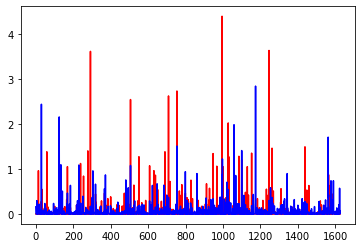

In [65]:
t=range(len(y_test))
plt.plot(t,y_test, 'r') # plotting t, a separately 
plt.plot(t,predictions, 'b') # plotting t, b separately 

In [66]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE for random forest: %f" % (rmse))

RMSE for random forest: 0.265548


In [67]:
filename = 'app/models/japan_model.h5'
joblib.dump(regr_JP, filename)

['app/models/japan_model.h5']

In [68]:
y=g['Other_Sales']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
#max_depth=2
regr_Other = RandomForestRegressor(random_state=0)
regr_Other.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [69]:
predictions=regr_Other.predict(x_test)

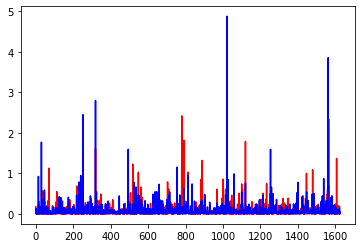

In [70]:
t=range(len(y_test))
plt.plot(t,y_test, 'r') # plotting t, a separately 
plt.plot(t,predictions, 'b') # plotting t, b separately 

In [71]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE for random forest: %f" % (rmse))

RMSE for random forest: 0.227245


In [72]:
filename = 'app/models/other_model.h5'
joblib.dump(regr_Other, filename)

['app/models/other_model.h5']